In [130]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
from chainconsumer import ChainConsumer
import corner

In [147]:
def log_prob(x, d, CN):
    s=x[0]
    CS=x[1]
    if CS <= 0.01 or CS >= 10.:
        return -100.
    else:
        return -0.5*np.log(CS) - 0.5*s**2/CS - 0.5*(s-d)**2/CN


In [159]:
nwalkers = 32
ndim=2
CN=1.
d=2.
p0 = np.zeros((nwalkers,ndim))#[d,CN]
np.random.seed(42)
p0[:,0]=d + np.random.rand(nwalkers)
p0[:,1]=CN + .2*np.random.rand(nwalkers)
print(np.shape(p0))
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob, args=[d,CN])


(32, 2)


In [160]:
state = sampler.run_mcmc(p0, 100)
sampler.reset()

In [161]:
sampler.run_mcmc(state,10000);

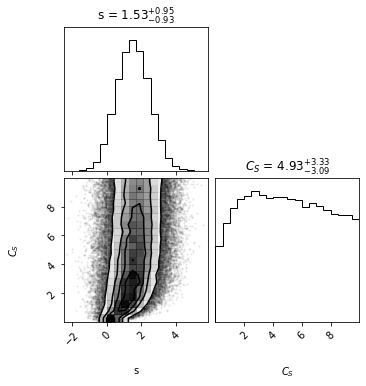

In [110]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
fig = corner.corner(flat_samples,labels=['s','$C_S$'],show_titles=True, title_kwargs={"fontsize": 12});
#plt.yscale('log')

In [128]:
d=2.
def like1d(l):
    tmp=np.log(l+1.) + d**2/(1.+l)
    return tmp
larr1d=like1d(lam)

NameError: name 'lam' is not defined

In [129]:
plt.plot(lam,np.exp(-.5*larr1d))
plt.xlabel('$C_s/C_n$')
plt.ylabel('1D Likelihood ($d=2C_n^{1/2}$)')
plt.savefig('like1d.png')

NameError: name 'lam' is not defined

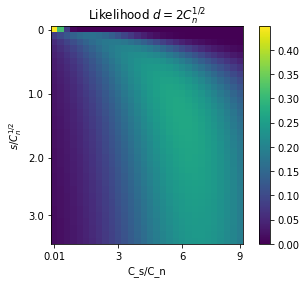

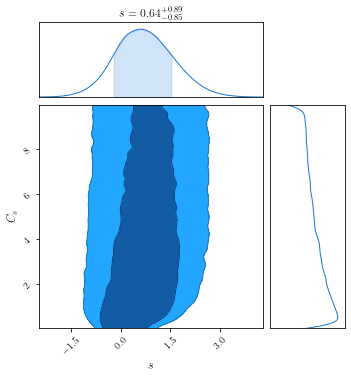

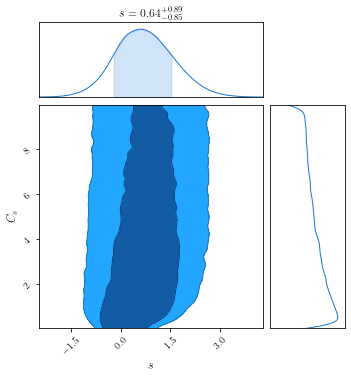

In [156]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)

c = ChainConsumer()
c.add_chain(flat_samples, parameters=["$s$", "$C_s$"])
#c.add_marker(location='max')
c.plotter.plot(filename="l1.png", figsize="column")


In [164]:
print(log_prob((1.,1.), d, CN))
print(log_prob((0.,.02), d, CN))
print(log_prob((1.88,4.2), d, CN))
print(-0.5*np.log(.02))

-1.0
-0.04398849728592702
-1.1455041674065662
1.956011502714073
